# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Andi Muhammad Nuzul
- Email: amuhnuzul@gmail.com
- Id Dicoding: nuuzuul

## Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    precision_recall_fscore_support
)
from sklearn.dummy import DummyClassifier
import joblib
import os
import warnings

### Menyiapkan data yang akan diguankan

## Data Understanding

Jumlah baris dan kolom: (4424, 37)

Distribusi kelas Status:
Status
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

Cek Missing Value:
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date            

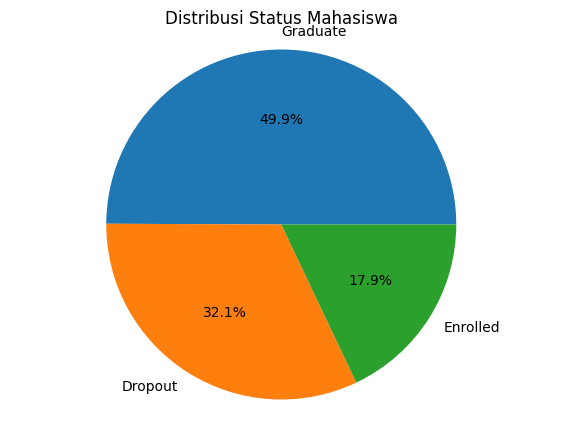


Statistik deskriptif:


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,...,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178571,18.669078,1.727848,8856.642631,0.890823,4.577758,132.613314,1.873192,19.561935,22.275316,...,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.605747,17.484682,1.313793,2063.566416,0.311897,10.216592,13.188332,6.914514,15.603186,15.343108,...,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,1.000000,1.000000,0.000000,33.000000,0.000000,1.000000,95.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9085.000000,1.000000,1.000000,125.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,17.000000,1.000000,9238.000000,1.000000,1.000000,133.100000,1.000000,19.000000,19.000000,...,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,39.000000,2.000000,9556.000000,1.000000,1.000000,140.000000,1.000000,37.000000,37.000000,...,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,6.000000,57.000000,9.000000,9991.000000,1.000000,43.000000,190.000000,109.000000,44.000000,44.000000,...,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


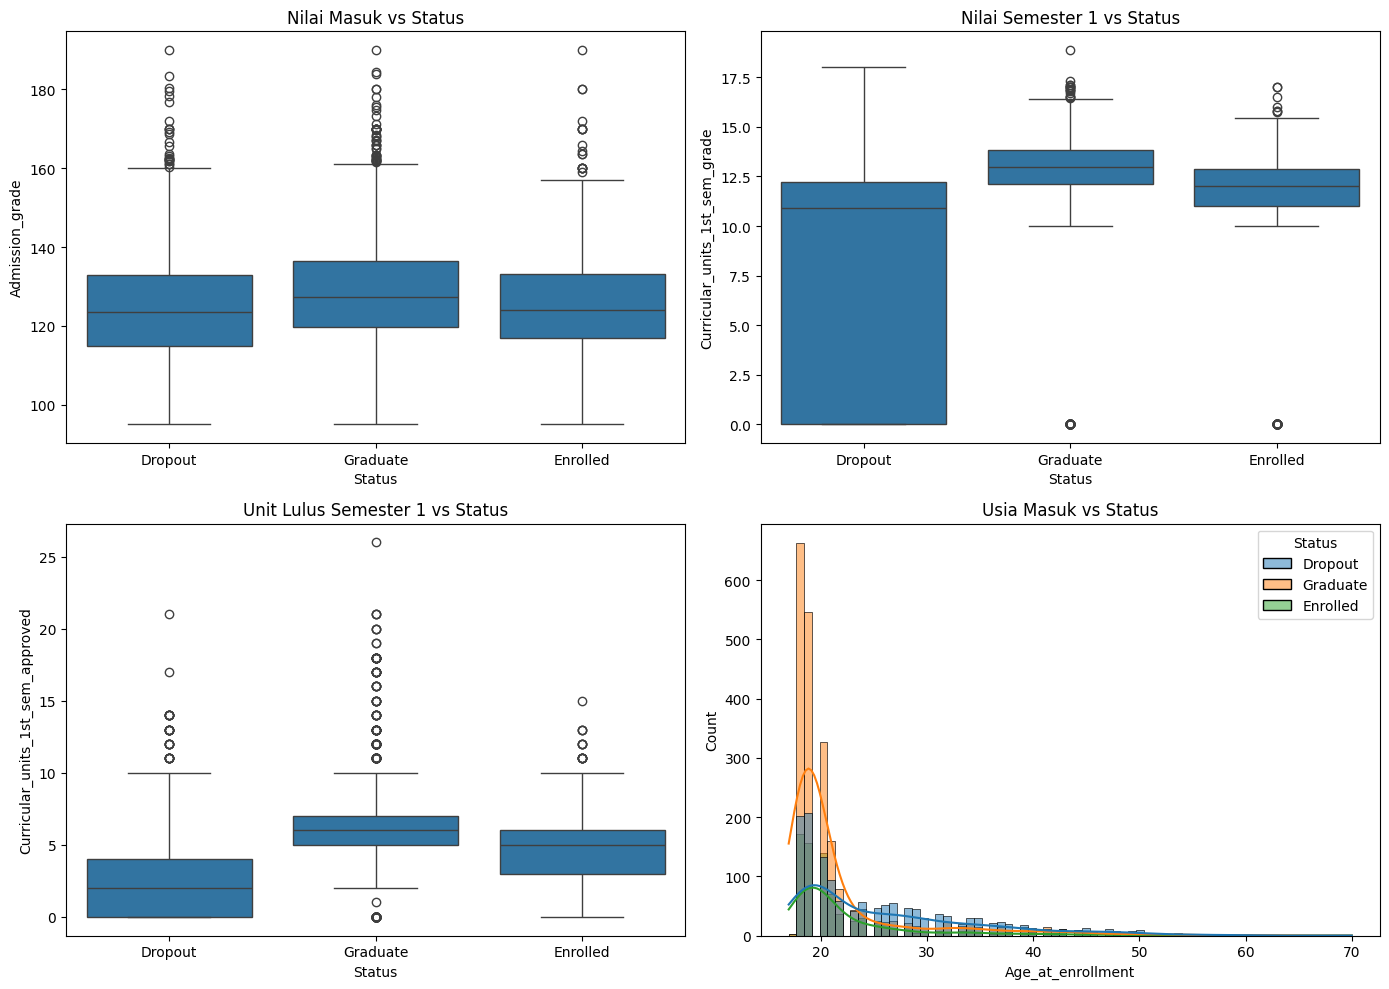

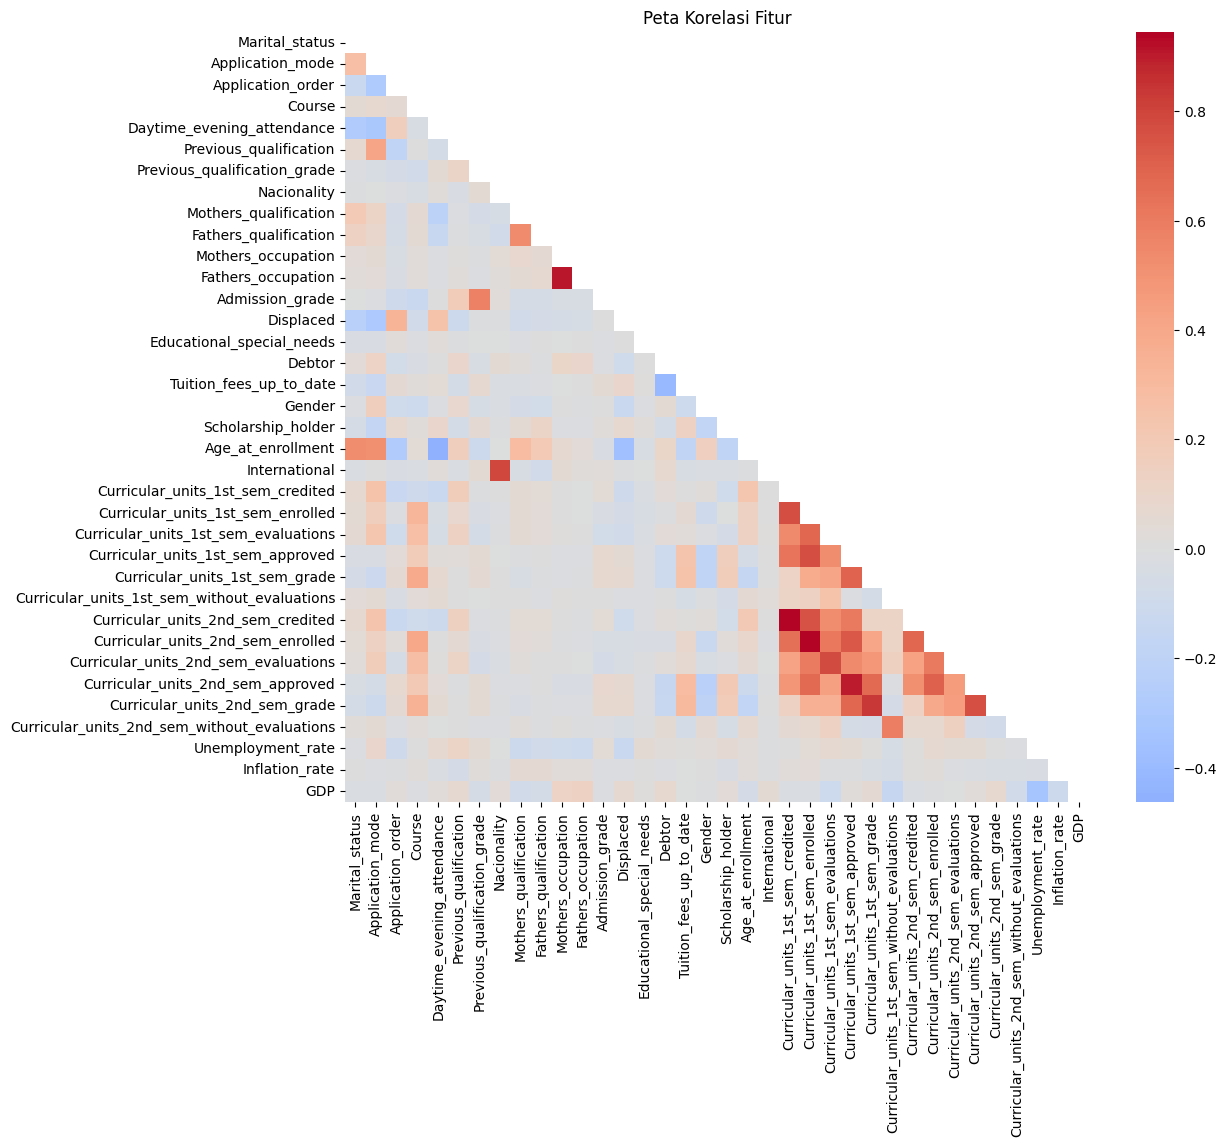

In [2]:
# Muat data
data = pd.read_csv("/content/sample_data/data.csv", sep=";")

# Tampilkan dimensi data
print("Jumlah baris dan kolom:", data.shape)

# Cek jumlah per kelas
print("\nDistribusi kelas Status:")
print(data['Status'].value_counts())

# Tampilkan missing value
print("\nCek Missing Value:")
print(data.isnull().sum())

# Visualisasi status mahasiswa
plt.figure(figsize=(7, 5))
plt.pie(data['Status'].value_counts(), labels=data['Status'].value_counts().index, autopct='%1.1f%%')
plt.title("Distribusi Status Mahasiswa")
plt.axis('equal')
plt.show()

# Statistik deskriptif fitur numerik
print("\nStatistik deskriptif:")
display(data.describe())

# Visualisasi performa akademik berdasarkan status
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.boxplot(x="Status", y="Admission_grade", data=data, ax=axes[0, 0])
axes[0, 0].set_title("Nilai Masuk vs Status")

sns.boxplot(x="Status", y="Curricular_units_1st_sem_grade", data=data, ax=axes[0, 1])
axes[0, 1].set_title("Nilai Semester 1 vs Status")

sns.boxplot(x="Status", y="Curricular_units_1st_sem_approved", data=data, ax=axes[1, 0])
axes[1, 0].set_title("Unit Lulus Semester 1 vs Status")

sns.histplot(data=data, x="Age_at_enrollment", hue="Status", kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Usia Masuk vs Status")

plt.tight_layout()
plt.show()

# Korelasi antar fitur numerik
plt.figure(figsize=(12, 10))
numerik = data.select_dtypes(include=["int64", "float64"])
corr_matrix = numerik.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, cmap="coolwarm", center=0)
plt.title("Peta Korelasi Fitur")
plt.show()

## Data Preparation / Preprocessing

In [5]:
warnings.filterwarnings('ignore')
# Pilih fitur yang relevan
selected_features = [
    'Marital_status', 'Application_mode', 'Course', 'Daytime_evening_attendance',
    'Previous_qualification', 'Previous_qualification_grade', 'Nacionality',
    'Admission_grade', 'Displaced', 'Educational_special_needs', 'Debtor',
    'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder', 'Age_at_enrollment',
    'International', 'Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_enrolled',
    'Curricular_units_1st_sem_evaluations', 'Curricular_units_1st_sem_approved',
    'Curricular_units_1st_sem_grade', 'Curricular_units_1st_sem_without_evaluations'
]

X = data[selected_features]
y = data['Status']

# Tangani nilai kosong
X.fillna(X.median(numeric_only=True), inplace=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# Standarisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Enkode label target
label_map = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
y_train_enc = y_train.map(label_map)
y_test_enc = y_test.map(label_map)

## Modeling

In [6]:
# Inisialisasi model Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train_scaled, y_train_enc)

# Simpan model dan scaler
os.makedirs("model", exist_ok=True)
joblib.dump(rf_model, "model/dropout_prediction_model.joblib")
joblib.dump(scaler, "model/scaler.joblib")
print("Model dan scaler berhasil disimpan.")

Model dan scaler berhasil disimpan.


## Evaluation


Akurasi: 0.7188

Laporan Klasifikasi:
              precision    recall  f1-score   support

     Dropout       0.71      0.72      0.71       355
    Enrolled       0.42      0.16      0.23       199
    Graduate       0.75      0.92      0.83       552

    accuracy                           0.72      1106
   macro avg       0.63      0.60      0.59      1106
weighted avg       0.68      0.72      0.68      1106



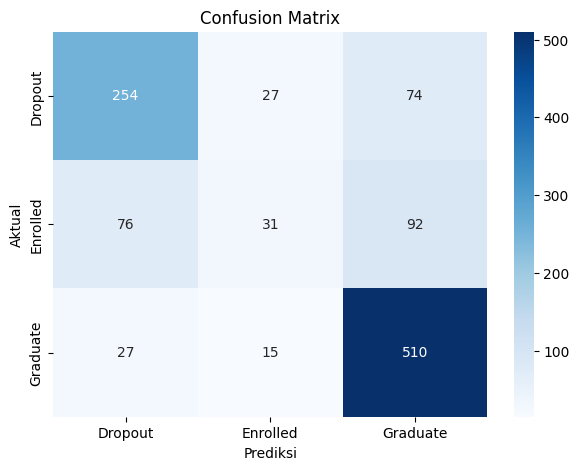

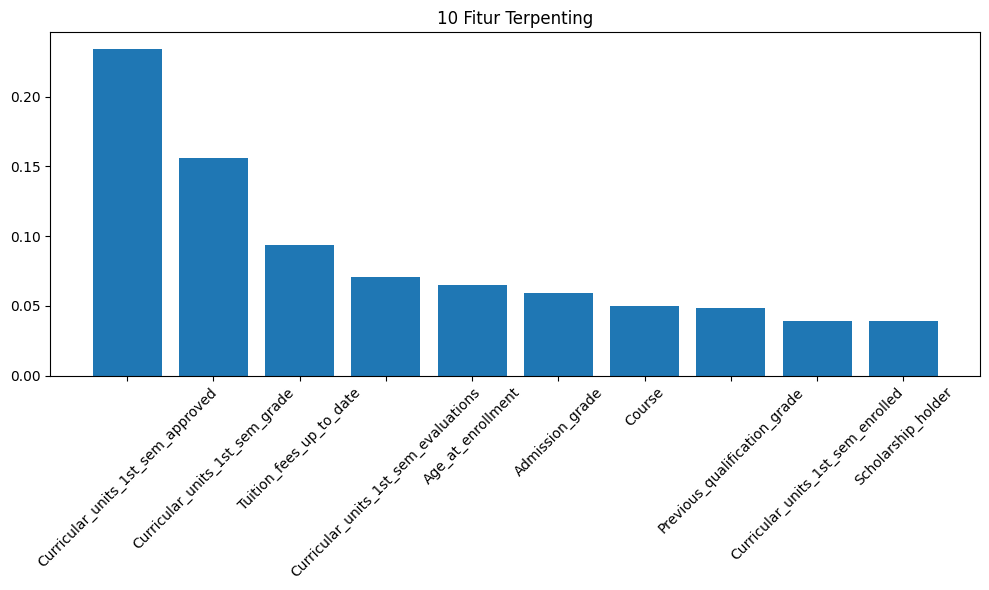


Fitur paling berpengaruh:
1. Curricular_units_1st_sem_approved: 0.2344
2. Curricular_units_1st_sem_grade: 0.1558
3. Tuition_fees_up_to_date: 0.0934
4. Curricular_units_1st_sem_evaluations: 0.0709
5. Age_at_enrollment: 0.0653
6. Admission_grade: 0.0594
7. Course: 0.0495
8. Previous_qualification_grade: 0.0487
9. Curricular_units_1st_sem_enrolled: 0.0394
10. Scholarship_holder: 0.0394

Perbandingan Model vs Baseline:
Random Forest: 0.7188
Baseline (Most Frequent): 0.4991
Selisih Akurasi: 0.2197


In [7]:
# Prediksi
y_pred = rf_model.predict(X_test_scaled)

# Evaluasi akurasi
acc = accuracy_score(y_test_enc, y_pred)
print(f"\nAkurasi: {acc:.4f}")

# Laporan klasifikasi
print("\nLaporan Klasifikasi:")
print(classification_report(y_test_enc, y_pred, target_names=label_map.keys()))

# Confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix(y_test_enc, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_map.keys(), yticklabels=label_map.keys())
plt.title("Confusion Matrix")
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.show()

# Visualisasi fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(10), importances[indices[:10]])
plt.xticks(range(10), [X.columns[i] for i in indices[:10]], rotation=45)
plt.title("10 Fitur Terpenting")
plt.tight_layout()
plt.show()

# Tampilkan fitur penting
print("\nFitur paling berpengaruh:")
for idx in range(10):
    print(f"{idx+1}. {X.columns[indices[idx]]}: {importances[indices[idx]]:.4f}")

# Bandingkan dengan model baseline
baseline = DummyClassifier(strategy="most_frequent")
baseline.fit(X_train_scaled, y_train_enc)
baseline_pred = baseline.predict(X_test_scaled)
baseline_acc = accuracy_score(y_test_enc, baseline_pred)

print("\nPerbandingan Model vs Baseline:")
print(f"Random Forest: {acc:.4f}")
print(f"Baseline (Most Frequent): {baseline_acc:.4f}")
print(f"Selisih Akurasi: {acc - baseline_acc:.4f}")